In [1]:
#GROUP BY IN PANDAS..
import pandas as pd
df1 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds1.csv')

In [2]:
df1

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started
Kolkata_FMCG,925,874.4,676,Pub,1379,Kol,1,KFMC,Goods,Jan 1920
NCR_Leagles,931,863.5,605,Pub,1935,NCR,0,NCRL,Services,Feb 1960
Bombay_Sporting,931,839.8,615,Pvt,154,Mum,0,SPRT,Services,Mar 1943
Bombay_Finance,899,917.0,674,Pub,1443,Mum,0,BFIN,Services,Apr 1925
Bangalore_Systems,900,881.6,650,Gov,1361,Blr,0,BSYS,Services,Apr 1950
Chennai_Shipping,992,821.0,665,Pub,1154,Che,1,SHIP,Services,Nov 1930
Bangalore_Breweries,966,805.0,895,Pvt,119,Blr,1,BREW,Goods,Oct 1971
Chennai_Chemicals,966,863.2,608,Pub,1656,Che,1,CHEM,Goods,Aug 1928
Indi_Services,954,733.0,609,Gov,13023,NCR,0,INDI,Services,Mar 1920


In [4]:
df1.Sector

Kolkata_FMCG           Pub
NCR_Leagles            Pub
Bombay_Sporting        Pvt
Bombay_Finance         Pub
Bangalore_Systems      Gov
Chennai_Shipping       Pub
Bangalore_Breweries    Pvt
Chennai_Chemicals      Pub
Indi_Services          Gov
Name: Sector, dtype: object

In [5]:
df1.Sector.count()

9

In [6]:
df1.Sector.value_counts()   #Gives the frequency of each value in series..

Pub    5
Pvt    2
Gov    2
Name: Sector, dtype: int64

In [15]:
dfg = df1.groupby(by='Sector')
print(type(dfg))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [16]:
for item in  dfg:
    print(item)
    print()

('Gov',                    Vol    Rev  Exp Sector  EmpCnt   HQ  MNC StockID       GST  \
Bangalore_Systems  900  881.6  650    Gov    1361  Blr    0    BSYS  Services   
Indi_Services      954  733.0  609    Gov   13023  NCR    0    INDI  Services   

                    Started  gvrank  
Bangalore_Systems  Apr 1950     1.0  
Indi_Services      Mar 1920     2.0  )

('Pub',                    Vol    Rev  Exp Sector  EmpCnt   HQ  MNC StockID       GST  \
Kolkata_FMCG       925  874.4  676    Pub    1379  Kol    1    KFMC     Goods   
NCR_Leagles        931  863.5  605    Pub    1935  NCR    0    NCRL  Services   
Bombay_Finance     899  917.0  674    Pub    1443  Mum    0    BFIN  Services   
Chennai_Shipping   992  821.0  665    Pub    1154  Che    1    SHIP  Services   
Chennai_Chemicals  966  863.2  608    Pub    1656  Che    1    CHEM     Goods   

                    Started  gvrank  
Kolkata_FMCG       Jan 1920     2.0  
NCR_Leagles        Feb 1960     3.0  
Bombay_Finance     Apr 

In [17]:
list(dfg)[0][0]

'Gov'

In [18]:
list(dfg)[0][1]

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started,gvrank
Bangalore_Systems,900,881.6,650,Gov,1361,Blr,0,BSYS,Services,Apr 1950,1.0
Indi_Services,954,733.0,609,Gov,13023,NCR,0,INDI,Services,Mar 1920,2.0


In [19]:
dfg['Vol'].mean()

Sector
Gov    927.0
Pub    942.6
Pvt    948.5
Name: Vol, dtype: float64

In [9]:
df1.groupby(by='Sector')['Vol'].mean()

Sector
Gov    927.0
Pub    942.6
Pvt    948.5
Name: Vol, dtype: float64

In [8]:
df1.groupby(by='Sector')[['Vol','Rev','EmpCnt']].mean()

,Vol,Rev,EmpCnt
Sector,,,
Gov,927.0,807.30,7192.0
Pub,942.6,867.82,1513.4
Pvt,948.5,822.40,136.5


In [11]:
def minmaxdiff(series):
    return series.max() - series.min()

In [12]:
df1.groupby(by='Sector')[['Vol','Rev','EmpCnt']].agg(['mean','min','max',minmaxdiff])

Vol                          Rev                           EmpCnt  \
         mean  min  max minmaxdiff    mean    min    max minmaxdiff    mean   
Sector                                                                        
Gov     927.0  900  954         54  807.30  733.0  881.6      148.6  7192.0   
Pub     942.6  899  992         93  867.82  821.0  917.0       96.0  1513.4   
Pvt     948.5  931  966         35  822.40  805.0  839.8       34.8   136.5   

                                
         min    max minmaxdiff  
Sector                          
Gov     1361  13023      11662  
Pub     1154   1935        781  
Pvt      119    154         35

In [13]:
df1['gvrank'] = df1.groupby(by='Sector')['Vol'].rank()
df1

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started,gvrank
Kolkata_FMCG,925,874.4,676,Pub,1379,Kol,1,KFMC,Goods,Jan 1920,2.0
NCR_Leagles,931,863.5,605,Pub,1935,NCR,0,NCRL,Services,Feb 1960,3.0
Bombay_Sporting,931,839.8,615,Pvt,154,Mum,0,SPRT,Services,Mar 1943,1.0
Bombay_Finance,899,917.0,674,Pub,1443,Mum,0,BFIN,Services,Apr 1925,1.0
Bangalore_Systems,900,881.6,650,Gov,1361,Blr,0,BSYS,Services,Apr 1950,1.0
Chennai_Shipping,992,821.0,665,Pub,1154,Che,1,SHIP,Services,Nov 1930,5.0
Bangalore_Breweries,966,805.0,895,Pvt,119,Blr,1,BREW,Goods,Oct 1971,2.0
Chennai_Chemicals,966,863.2,608,Pub,1656,Che,1,CHEM,Goods,Aug 1928,4.0
Indi_Services,954,733.0,609,Gov,13023,NCR,0,INDI,Services,Mar 1920,2.0


In [14]:
df1.groupby(by=['Sector','GST'])['Vol'].mean()

Sector  GST     
Gov     Services    927.000000
Pub     Goods       945.500000
        Services    940.666667
Pvt     Goods       966.000000
        Services    931.000000
Name: Vol, dtype: float64

In [20]:
#CROSSTAB TOPICS..
pd.crosstab(df1.Sector,df1.GST)

GST,Goods,Services
Sector,,
Gov,0,2
Pub,2,3
Pvt,1,1


In [23]:
pd.crosstab(df1.Sector,df1.GST, values=df1.Vol, aggfunc='mean')

GST,Goods,Services
Sector,,
Gov,NaN,927.000000
Pub,945.5,940.666667
Pvt,966.0,931.000000


In [27]:
df1[(df1.Sector == 'Gov') & (df1.GST == 'Services')]

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started,gvrank
Bangalore_Systems,900,881.6,650,Gov,1361,Blr,0,BSYS,Services,Apr 1950,1.0
Indi_Services,954,733.0,609,Gov,13023,NCR,0,INDI,Services,Mar 1920,2.0


In [ ]:
#RENAME OF LABELS & REPLACE OF NAMES..
#Rename is for Rows and columns..
#Replace is for data name change..

In [33]:
df2 = df1.rename(columns={'Rev':'Revenue','Vol':'Volume'},index={'Indi_Services':'IR'}, inplace=False)

In [31]:
df1 #Doesn't Change The Old Table..

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started,gvrank
Kolkata_FMCG,925,874.4,676,Pub,1379,Kol,1,KFMC,Goods,Jan 1920,2.0
NCR_Leagles,931,863.5,605,Pub,1935,NCR,0,NCRL,Services,Feb 1960,3.0
Bombay_Sporting,931,839.8,615,Pvt,154,Mum,0,SPRT,Services,Mar 1943,1.0
Bombay_Finance,899,917.0,674,Pub,1443,Mum,0,BFIN,Services,Apr 1925,1.0
Bangalore_Systems,900,881.6,650,Gov,1361,Blr,0,BSYS,Services,Apr 1950,1.0
Chennai_Shipping,992,821.0,665,Pub,1154,Che,1,SHIP,Services,Nov 1930,5.0
Bangalore_Breweries,966,805.0,895,Pvt,119,Blr,1,BREW,Goods,Oct 1971,2.0
Chennai_Chemicals,966,863.2,608,Pub,1656,Che,1,CHEM,Goods,Aug 1928,4.0
Indi_Services,954,733.0,609,Gov,13023,NCR,0,INDI,Services,Mar 1920,2.0


In [34]:
df2  #Updated Table With Rename()

,Volume,Revenue,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started,gvrank
Kolkata_FMCG,925,874.4,676,Pub,1379,Kol,1,KFMC,Goods,Jan 1920,2.0
NCR_Leagles,931,863.5,605,Pub,1935,NCR,0,NCRL,Services,Feb 1960,3.0
Bombay_Sporting,931,839.8,615,Pvt,154,Mum,0,SPRT,Services,Mar 1943,1.0
Bombay_Finance,899,917.0,674,Pub,1443,Mum,0,BFIN,Services,Apr 1925,1.0
Bangalore_Systems,900,881.6,650,Gov,1361,Blr,0,BSYS,Services,Apr 1950,1.0
Chennai_Shipping,992,821.0,665,Pub,1154,Che,1,SHIP,Services,Nov 1930,5.0
Bangalore_Breweries,966,805.0,895,Pvt,119,Blr,1,BREW,Goods,Oct 1971,2.0
Chennai_Chemicals,966,863.2,608,Pub,1656,Che,1,CHEM,Goods,Aug 1928,4.0
IR,954,733.0,609,Gov,13023,NCR,0,INDI,Services,Mar 1920,2.0


In [35]:
df3 = df1.replace({'Pub':'Public'}, inplace=False)  #DF3 for O/P..

In [37]:
#CONCATENATION TOPICS...
     # KEYS is optional.. It will differentiate that where it is joining from..

In [46]:
df11 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds11.csv')
df12 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds12.csv')

In [54]:
print(df11)
print()
print(df12)
print()

                 Vol    Rev  Exp Sector  EmpCnt
Kolkata_FMCG     900  874.4  676    Pub    1379
NCR_Leagles      931  863.5  605    Pub    1935
Bombay_Sporting  975  839.8  615    Pvt     154

                   Vol    Rev  Exp Sector   HQ
Bombay_Sporting    925  839.8  715    Pvt  Mum
Bombay_Finance     899  917.0  674    Pub  Mum
Bangalore_Systems  931  881.6  650    Gov  Blr
Chennai_Shipping   992  821.0  665    Pub  Che



In [48]:
pd.concat(objs=(df11,df12), axis=0, join='outer')  #UNION mari..

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.4,676,Pub,1379.0,NaN
NCR_Leagles,931,863.5,605,Pub,1935.0,NaN
Bombay_Sporting,975,839.8,615,Pvt,154.0,NaN
Bombay_Sporting,925,839.8,715,Pvt,NaN,Mum
Bombay_Finance,899,917.0,674,Pub,NaN,Mum
Bangalore_Systems,931,881.6,650,Gov,NaN,Blr
Chennai_Shipping,992,821.0,665,Pub,NaN,Che


In [49]:
pd.concat(objs=(df11,df12), axis=0, join='inner')  #INTERSECTION mari..

,Vol,Rev,Exp,Sector
Kolkata_FMCG,900,874.4,676,Pub
NCR_Leagles,931,863.5,605,Pub
Bombay_Sporting,975,839.8,615,Pvt
Bombay_Sporting,925,839.8,715,Pvt
Bombay_Finance,899,917.0,674,Pub
Bangalore_Systems,931,881.6,650,Gov
Chennai_Shipping,992,821.0,665,Pub


In [ ]:
#MERGE TOPICS..
#(left =, Right =, how =, on =, indicator =)..

In [55]:
df21 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds21.csv')
df22 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds22.csv')
df23 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds23.csv')

In [69]:
print(df21)
print(df22)
print(df23)

                    stock_id   HQ  high
Bangalore_Breweries     BREW  Blr  1100
Chennai_Shipping        SHIP  Che  1200
Kolkata_FMCG            KFMC  Kol  2000
NCR_Leagles             NCRL  NCR  1200
                    stock_name   HQ  vol
Bangalore_Breweries       BREW  Blr  350
Bombay_Finance            BFIN  Mum  450
Chennai_Chemicals         CHEM  Che  550
Kolkata_FMCG              KFMC  Kol  500
                    stock_name   HQ  empcnt
Chennai_Shipping          SHIP  Che   10000
Bangalore_Breweries       BREW  Blr    5000
Bombay_Finance            BFIN  Mum   30000
Bangalore_Systems         BSYS  Blr   20000


In [58]:
pd.merge(left=df21, right=df22, how='inner', on='HQ', indicator=True)

,stock_id,HQ,high,stock_name,vol,_merge
0,BREW,Blr,1100,BREW,350,both
1,SHIP,Che,1200,CHEM,550,both
2,KFMC,Kol,2000,KFMC,500,both


In [60]:
pd.merge(left=df21, right=df22, how='outer', on='HQ', indicator=True)

,stock_id,HQ,high,stock_name,vol,_merge
0,BREW,Blr,1100.0,BREW,350.0,both
1,SHIP,Che,1200.0,CHEM,550.0,both
2,KFMC,Kol,2000.0,KFMC,500.0,both
3,NCRL,NCR,1200.0,NaN,NaN,left_only
4,NaN,Mum,NaN,BFIN,450.0,right_only


In [70]:
pd.merge(left=df21, right=df22, how='left', on='HQ', indicator=True)

,stock_id,HQ,high,stock_name,vol,_merge
0,BREW,Blr,1100,BREW,350.0,both
1,SHIP,Che,1200,CHEM,550.0,both
2,KFMC,Kol,2000,KFMC,500.0,both
3,NCRL,NCR,1200,NaN,NaN,left_only


In [71]:
pd.merge(left=df21, right=df22, how='right', on='HQ', indicator=True)

,stock_id,HQ,high,stock_name,vol,_merge
0,BREW,Blr,1100.0,BREW,350,both
1,NaN,Mum,NaN,BFIN,450,right_only
2,SHIP,Che,1200.0,CHEM,550,both
3,KFMC,Kol,2000.0,KFMC,500,both


In [73]:
pd.merge(left=df23, right=df23, how='inner', on='HQ', indicator=True)

,stock_name_x,HQ,empcnt_x,stock_name_y,empcnt_y,_merge
0,SHIP,Che,10000,SHIP,10000,both
1,BREW,Blr,5000,BREW,5000,both
2,BREW,Blr,5000,BSYS,20000,both
3,BSYS,Blr,20000,BREW,5000,both
4,BSYS,Blr,20000,BSYS,20000,both
5,BFIN,Mum,30000,BFIN,30000,both


In [74]:
pd.merge(left=df22, right=df23, how='inner', on='HQ', indicator=True)

,stock_name_x,HQ,vol,stock_name_y,empcnt,_merge
0,BREW,Blr,350,BREW,5000,both
1,BREW,Blr,350,BSYS,20000,both
2,BFIN,Mum,450,BFIN,30000,both
3,CHEM,Che,550,SHIP,10000,both


In [76]:
pd.merge(left=df22, right=df23, how='inner', on=['HQ','stock_name'], indicator=True)

,stock_name,HQ,vol,empcnt,_merge
0,BREW,Blr,350,5000,both
1,BFIN,Mum,450,30000,both


In [78]:
pd.merge(left=df21, right=df22, how='inner', left_on='stock_id', right_on='stock_name', indicator=True)

,stock_id,HQ_x,high,stock_name,HQ_y,vol,_merge
0,BREW,Blr,1100,BREW,Blr,350,both
1,KFMC,Kol,2000,KFMC,Kol,500,both


In [ ]:
#MULTIINDEX TOPICS..

In [80]:
row_level0_labels = ['Tata','Birla','Wipro','MRF']
row_level1_labels = ['Tech', 'FMCG']

col_level0_labels = [2020, 2021]
col_level1_labels = ['Q1', 'Q2']

In [81]:
row_labels = pd.MultiIndex.from_product([row_level0_labels,row_level1_labels])
row_labels

MultiIndex([( 'Tata', 'Tech'),
            ( 'Tata', 'FMCG'),
            ('Birla', 'Tech'),
            ('Birla', 'FMCG'),
            ('Wipro', 'Tech'),
            ('Wipro', 'FMCG'),
            (  'MRF', 'Tech'),
            (  'MRF', 'FMCG')],
           )

In [82]:
col_labels = pd.MultiIndex.from_product([col_level0_labels,col_level1_labels])
col_labels

MultiIndex([(2020, 'Q1'),
            (2020, 'Q2'),
            (2021, 'Q1'),
            (2021, 'Q2')],
           )

In [83]:
import numpy as np
n84 = np.random.randint(low=10, high=100, size=(8,4))
n84

array([[59, 47, 18, 54],
       [62, 17, 92, 35],
       [82, 29, 13, 84],
       [77, 72, 83, 86],
       [69, 79, 50, 48],
       [42, 48, 95, 12],
       [20, 63, 13, 52],
       [77, 25, 29, 32]])

In [93]:
df1 = pd.DataFrame(n84,index=row_labels, columns=col_labels)
df1

2020     2021    
             Q1  Q2   Q1  Q2
Tata  Tech   59  47   18  54
      FMCG   62  17   92  35
Birla Tech   82  29   13  84
      FMCG   77  72   83  86
Wipro Tech   69  79   50  48
      FMCG   42  48   95  12
MRF   Tech   20  63   13  52
      FMCG   77  25   29  32

In [157]:
#STACK & UNSTACK TOPICS..
#STACK -- COL TO ROW
#UNSTACK -- ROW TO COL

In [103]:
df1.stack()

2020  2021
Tata  Tech Q1    59    18
           Q2    47    54
      FMCG Q1    62    92
           Q2    17    35
Birla Tech Q1    82    13
           Q2    29    84
      FMCG Q1    77    83
           Q2    72    86
Wipro Tech Q1    69    50
           Q2    79    48
      FMCG Q1    42    95
           Q2    48    12
MRF   Tech Q1    20    13
           Q2    63    52
      FMCG Q1    77    29
           Q2    25    32

In [92]:
df1.unstack()

2020                2021               
        Q1        Q2        Q1        Q2     
      FMCG Tech FMCG Tech FMCG Tech FMCG Tech
Birla   77   82   72   29   83   13   86   84
MRF     77   20   25   63   29   13   32   52
Tata    62   59   17   47   92   18   35   54
Wipro   42   69   48   79   95   50   12   48

In [165]:
df1.stack(level=0).unstack(level=0).unstack(level=1).stack(level=0).stack(level=1).unstack(level=0)

Birla       MRF      Tata      Wipro     
         FMCG Tech FMCG Tech FMCG Tech  FMCG Tech
Q1 2020    77   82   77   20   62   59    42   69
   2021    83   13   29   13   92   18    95   50
Q2 2020    72   29   25   63   17   47    48   79
   2021    86   84   32   52   35   54    12   48

In [178]:
#MELTING TOPICS..

df31 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds31.csv')
df31

,Location,Temperature,Jan2019,Feb2019,Mar2019
0,Bangalore,Predict,23,25,28
1,Chennai,Actual,32,34,36


In [173]:
pd.melt(df31, id_vars=['Location','Temperature'], var_name='Melted_col_names')

,Location,Temperature,Melted_col_names,value
0,Bangalore,Predict,Jan2019,23
1,Chennai,Actual,Jan2019,32
2,Bangalore,Predict,Feb2019,25
3,Chennai,Actual,Feb2019,34
4,Bangalore,Predict,Mar2019,28
5,Chennai,Actual,Mar2019,36


In [177]:
pd.melt(df31, id_vars=['Location','Temperature'], var_name='Melted_col_names', value_name='Melted_val_names')

,Location,Temperature,Melted_col_names,Melted_val_names
0,Bangalore,Predict,Jan2019,23
1,Chennai,Actual,Jan2019,32
2,Bangalore,Predict,Feb2019,25
3,Chennai,Actual,Feb2019,34
4,Bangalore,Predict,Mar2019,28
5,Chennai,Actual,Mar2019,36


In [193]:
df = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds0.csv')
df           #Generally see for reference..

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.4,676,Pub,1379.0,Kol
NCR_Leagles,931,NaN,605,NaN,NaN,NCR
Bombay_Sporting,925,839.8,615,Pvt,154.0,Mum
Bombay_Finance,899,917.0,674,Pub,1443.0,Mum
Bangalore_Systems,931,881.6,650,Gov,1361.0,Blr
Chennai_Shipping,992,NaN,665,NaN,1154.0,Che
Bangalore_Breweries,966,805.0,895,NaN,119.0,Blr
Chennai_Chemicals,966,863.2,608,Pub,1656.0,Che
Indi_Services,954,733.0,609,Gov,13023.0,NCR


In [195]:
df.info()        #See this for whether there is null or non null values..

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Kolkata_FMCG to Indi_Services
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vol     9 non-null      int64  
 1   Rev     7 non-null      float64
 2   Exp     9 non-null      int64  
 3   Sector  6 non-null      object 
 4   EmpCnt  8 non-null      float64
 5   HQ      9 non-null      object 
dtypes: float64(2), int64(2), object(2)
memory usage: 504.0+ bytes


In [196]:
df.isna()        #Check for null values returns TRUE/FALSE..

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,False,False,False,False,False,False
NCR_Leagles,False,True,False,True,True,False
Bombay_Sporting,False,False,False,False,False,False
Bombay_Finance,False,False,False,False,False,False
Bangalore_Systems,False,False,False,False,False,False
Chennai_Shipping,False,True,False,True,False,False
Bangalore_Breweries,False,False,False,True,False,False
Chennai_Chemicals,False,False,False,False,False,False
Indi_Services,False,False,False,False,False,False


In [197]:
df.isna().sum()  #There is no NAN values..That why sum() is zero 0..

Vol       0
Rev       2
Exp       0
Sector    3
EmpCnt    1
HQ        0
dtype: int64

In [198]:
df.dropna()    #Drop NULL values completely..

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.4,676,Pub,1379.0,Kol
Bombay_Sporting,925,839.8,615,Pvt,154.0,Mum
Bombay_Finance,899,917.0,674,Pub,1443.0,Mum
Bangalore_Systems,931,881.6,650,Gov,1361.0,Blr
Chennai_Chemicals,966,863.2,608,Pub,1656.0,Che
Indi_Services,954,733.0,609,Gov,13023.0,NCR


In [199]:
df.fillna(888)

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.4,676,Pub,1379.0,Kol
NCR_Leagles,931,888.0,605,888,888.0,NCR
Bombay_Sporting,925,839.8,615,Pvt,154.0,Mum
Bombay_Finance,899,917.0,674,Pub,1443.0,Mum
Bangalore_Systems,931,881.6,650,Gov,1361.0,Blr
Chennai_Shipping,992,888.0,665,888,1154.0,Che
Bangalore_Breweries,966,805.0,895,888,119.0,Blr
Chennai_Chemicals,966,863.2,608,Pub,1656.0,Che
Indi_Services,954,733.0,609,Gov,13023.0,NCR


In [200]:
df.Rev.fillna(888)

Kolkata_FMCG           874.4
NCR_Leagles            888.0
Bombay_Sporting        839.8
Bombay_Finance         917.0
Bangalore_Systems      881.6
Chennai_Shipping       888.0
Bangalore_Breweries    805.0
Chennai_Chemicals      863.2
Indi_Services          733.0
Name: Rev, dtype: float64

In [202]:
df.Rev.fillna(df.Rev.mean(), inplace=True)

In [203]:
df     #Showing the result by giving DF..

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.400000,676,Pub,1379.0,Kol
NCR_Leagles,931,844.857143,605,NaN,NaN,NCR
Bombay_Sporting,925,839.800000,615,Pvt,154.0,Mum
Bombay_Finance,899,917.000000,674,Pub,1443.0,Mum
Bangalore_Systems,931,881.600000,650,Gov,1361.0,Blr
Chennai_Shipping,992,844.857143,665,NaN,1154.0,Che
Bangalore_Breweries,966,805.000000,895,NaN,119.0,Blr
Chennai_Chemicals,966,863.200000,608,Pub,1656.0,Che
Indi_Services,954,733.000000,609,Gov,13023.0,NCR


In [205]:
df.Sector.fillna(method='bfill', inplace=True)
df

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.400000,676,Pub,1379.0,Kol
NCR_Leagles,931,844.857143,605,Pvt,NaN,NCR
Bombay_Sporting,925,839.800000,615,Pvt,154.0,Mum
Bombay_Finance,899,917.000000,674,Pub,1443.0,Mum
Bangalore_Systems,931,881.600000,650,Gov,1361.0,Blr
Chennai_Shipping,992,844.857143,665,Pub,1154.0,Che
Bangalore_Breweries,966,805.000000,895,Pub,119.0,Blr
Chennai_Chemicals,966,863.200000,608,Pub,1656.0,Che
Indi_Services,954,733.000000,609,Gov,13023.0,NCR


In [ ]:
#DROP ROW/COLUMNS..

In [206]:
df0 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds0.csv')
df0

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.4,676,Pub,1379.0,Kol
NCR_Leagles,931,NaN,605,NaN,NaN,NCR
Bombay_Sporting,925,839.8,615,Pvt,154.0,Mum
Bombay_Finance,899,917.0,674,Pub,1443.0,Mum
Bangalore_Systems,931,881.6,650,Gov,1361.0,Blr
Chennai_Shipping,992,NaN,665,NaN,1154.0,Che
Bangalore_Breweries,966,805.0,895,NaN,119.0,Blr
Chennai_Chemicals,966,863.2,608,Pub,1656.0,Che
Indi_Services,954,733.0,609,Gov,13023.0,NCR


In [207]:
df0.drop(index=['Chennai_Chemicals', 'Bangalore_Systems'])

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.4,676,Pub,1379.0,Kol
NCR_Leagles,931,NaN,605,NaN,NaN,NCR
Bombay_Sporting,925,839.8,615,Pvt,154.0,Mum
Bombay_Finance,899,917.0,674,Pub,1443.0,Mum
Chennai_Shipping,992,NaN,665,NaN,1154.0,Che
Bangalore_Breweries,966,805.0,895,NaN,119.0,Blr
Indi_Services,954,733.0,609,Gov,13023.0,NCR


In [208]:
df0.drop(index=['Chennai_Chemicals','Bangalore_Systems'], columns=['Rev','Exp','HQ'])

,Vol,Sector,EmpCnt
Kolkata_FMCG,900,Pub,1379.0
NCR_Leagles,931,NaN,NaN
Bombay_Sporting,925,Pvt,154.0
Bombay_Finance,899,Pub,1443.0
Chennai_Shipping,992,NaN,1154.0
Bangalore_Breweries,966,NaN,119.0
Indi_Services,954,Gov,13023.0


In [212]:
#DUPLICATE HANDLING..

df33 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds33.csv')
df33

,Date,City,Temperature,Humidity
0,15/1/2019,Shimla,11,67
1,15/2/2019,Shimla,12,65
2,15/3/2019,Shimla,11,57
3,15/1/2019,Shimla,11,67
4,15/1/2019,Pune,29,34
5,15/2/2019,Pune,32,26
6,15/1/2020,Pune,29,21
7,15/1/2019,Mysore,28,49
8,15/2/2019,Mysore,31,47
9,15/1/2020,Mysore,33,49


In [219]:
df33.duplicated(keep=False)   #Checking whether there is duplicate or not returns True/False..

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [220]:
df33.duplicated(keep=False, subset=['City', 'Temperature'])

0     True
1    False
2     True
3     True
4     True
5    False
6     True
7    False
8    False
9    False
dtype: bool

In [221]:
df33.drop_duplicates(keep=False)

,Date,City,Temperature,Humidity
1,15/2/2019,Shimla,12,65
2,15/3/2019,Shimla,11,57
4,15/1/2019,Pune,29,34
5,15/2/2019,Pune,32,26
6,15/1/2020,Pune,29,21
7,15/1/2019,Mysore,28,49
8,15/2/2019,Mysore,31,47
9,15/1/2020,Mysore,33,49


In [222]:
df33.drop_duplicates(keep=False, subset=['City', 'Temperature'])

,Date,City,Temperature,Humidity
1,15/2/2019,Shimla,12,65
5,15/2/2019,Pune,32,26
7,15/1/2019,Mysore,28,49
8,15/2/2019,Mysore,31,47
9,15/1/2020,Mysore,33,49


In [223]:
#MATPLOTLIB (DATA VISUALIZATION)..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df41 = pd.read_csv('https://raw.githubusercontent.com/vcsgithub/vcsgithub.github.io/master/lds41.csv')
df41

,model,mpg,cyl,disp,hp,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.440,18.30,1,0,4,4


In [ ]:
#SCATTER PLOT

In [232]:
x1 = np.arange(5)
y1 = x1 * 2
y2 = x1 ** 2
print(y1)
print(y2)

[0 2 4 6 8]
[ 0  1  4  9 16]


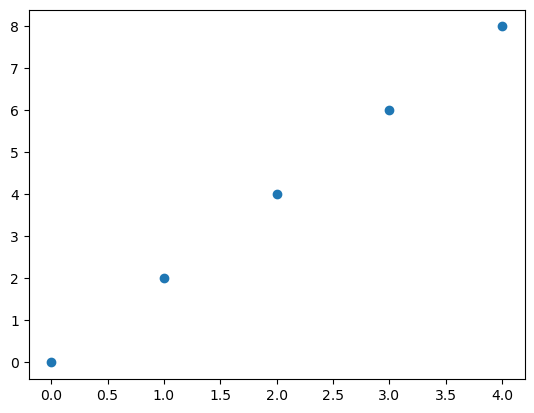

In [236]:
plt.scatter(x = x1, y = y1)       #plt.savefig('scatter.jpg')
plt.show()

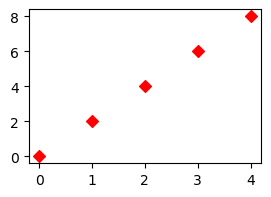

In [262]:
plt.figure(figsize=(3,2), dpi=100)
plt.scatter(x=x1, y=y1, color='red', marker='D')
plt.show()

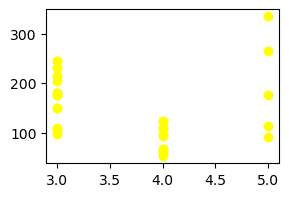

In [268]:
plt.figure(figsize=(3,2))           
plt.scatter(x=df41.gear, y=df41.hp, color='yellow')
plt.show()

<Axes: xlabel='gear', ylabel='mpg'>

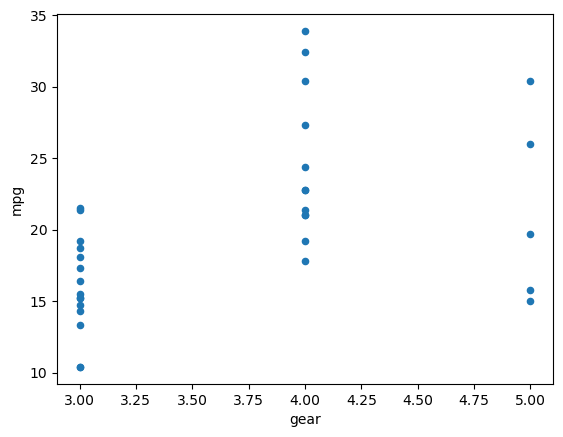

In [280]:
df41.plot(kind='scatter', x = 'gear', y = 'mpg')    #Another way of doing like above...

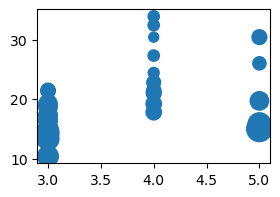

In [278]:
plt.figure(figsize=(3,2))
plt.scatter(x=df41.gear, y=df41.mpg, s=df41.hp)

In [283]:
#LINE PLOT..

x1 = np.arange(5)
y1 = x1 * 2
y2 = x1 ** 2
print(y1)
print(y2)

[0 2 4 6 8]
[ 0  1  4  9 16]


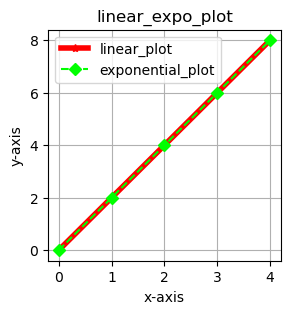

In [291]:
plt.figure(figsize=(3,3))
plt.plot(x1,y1, marker = '*', color = 'red', label='linear_plot', linewidth=4)
plt.plot(x1,y1, marker = 'D', color = '#00ff00', label = 'exponential_plot', linestyle = 'dashed')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.title('linear_expo_plot')

#plt.xticks([1,2,3,4,5,6,7,8,9,10])
#plt.yticks([1,2,3,45,6,,7,8,9,10])

plt.legend()
plt.show()

<Axes: xlabel='wt'>

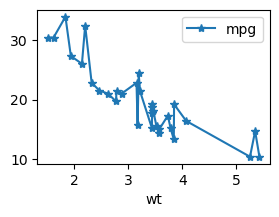

In [306]:
df41.sort_values(by='wt').plot(kind = 'line', x = 'wt', y='mpg', figsize=(3,2), marker='*')

#plt.plot(df41.wt, df41.mpg, marker='*')